<a href="https://colab.research.google.com/github/justbriang/Algo-tasks/blob/master/AI_Cat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis of reviews

In [16]:
import numpy as np
from tensorflow import keras


from keras import Sequential

import tensorflow as tf
from keras.datasets import imdb

# in the below case the data will be split 50/50, but we want to avoid such a scenario.Best practices are usually 80/20 or 70/30 splits, as this results in a better model

In [17]:
(x_train, y_train), (x_test, y_test)=imdb.load_data(
    path="imdb.npz",
    num_words=10000,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
   
)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

We will therefore merge the data then later split 80/20

In [18]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

EXPLORING THE DATA

In [19]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))



Categories: [0 1]
Number of unique words: 9998


From the above its clear that the dataset is labeled into two categories 0,1, representing the sentiment of the review. Where 0 represents negative sentiment and 1 represents positive sentiment

Below we will sample a single review and check its label

In [20]:
print("Label:", targets[20])

Label: 1
print(data[20])

Label: 0
[1, 617, 11, 3875, 17, 2, 14, 966, 78, 20, 9, 38, 78, 15, 25, 413, 2, 5, 28, 8, 106, 12, 8, 4, 130, 43, 8, 67, 48, 12, 100, 79, 101, 433, 5, 12, 127, 4, 769, 9, 38, 727, 12, 186, 398, 34, 6, 312, 396, 2, 707, 4, 732, 26, 1235, 21, 2, 128, 74, 4, 2, 5, 4, 116, 9, 1639, 10, 10, 4, 2, 2, 186, 8, 28, 77, 2586, 39, 4, 4135, 2, 7, 2, 2, 50, 161, 306, 8, 30, 6, 686, 204, 326, 11, 4, 226, 20, 10, 10, 13, 258, 14, 20, 8, 30, 38, 78, 15, 13, 1498, 91, 7, 4, 96, 143, 10, 10, 9859, 9064, 144, 3261, 27, 419, 11, 902, 29, 540, 887, 4, 278]


Below we will retrieve the dictornary mapping word indices back into the original words so that we can be able to read the review

In [21]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[20]] )
print(decoded) 

# shown in australia as # this incredibly bad movie is so bad that you become # and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school # class the sets are pathetic but # better than the # and the acting is wooden br br the # # seems to have been stolen from the props # of # # there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money


note:each # represents an unknown word, this is as a result of the word not being part of the word not being part of the word dictionary we are using

Data preprocessing
We will vectoruse every review to ensure each contains exactly 10000 numbers
NOTE: we will fill every review that is shorter than 10000 with zeros

This is vital as every input for our ANN needs to have the same size.
In addition, we will also transform the targets into floats. 

In [22]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

Below we will proceed to split the data in an 80/20 split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2)

Verify successful split

In [24]:
x_train.shape

(40000, 10000)

In [25]:
x_test.shape

(10000, 10000)

Building and training model
now we will build our simple neural network

In [26]:
from keras import layers

model=Sequential()
# Input Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
________________________________________________

We will now compile our model. We use the “adam” optimizer. We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

In [27]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

we will now train our model. In training we will use a batch size of 256 and 3 epochs

In [28]:

history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 256,
 validation_data = (x_test, y_test),
 verbose=1
)

Epoch 1/2
157/157 [==============================] - 4s 22ms/step - loss: 0.4818 - accuracy: 0.7541 - val_loss: 0.2563 - val_accuracy: 0.8950
Epoch 2/2
157/157 [==============================] - 3s 20ms/step - loss: 0.1972 - accuracy: 0.9266 - val_loss: 0.2616 - val_accuracy: 0.8916


In [29]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", (scores[1]*100),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8916
Accuracy:  89.16000127792358 %


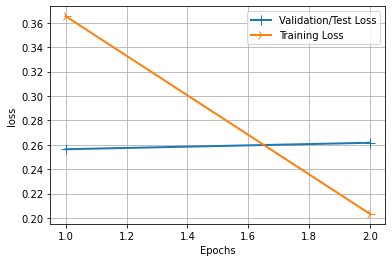

In [30]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1 )

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()